# For all clusters

In [7]:
from pylab import *
import matplotlib
%matplotlib inline
import matplotlib.gridspec as gridspec
from scipy.stats import kde, binned_statistic

GC=4.301*1.0e4 ##km2 kpc (10*10 Msun-1) s-2
path="/home/wcui/Work/Data/Box_1024_410_Trieste/"

In [8]:
dm_s=np.loadtxt(path+"RDM/KP_s128-al.txt")
cs_s=np.loadtxt(path+"CSF/KP_s128-al.txt")
ag_s=np.loadtxt(path+"AGN/KP_s128-al.txt")

MDM=np.log10(dm_s[:,0]*1.0e10); MCS=np.log10(cs_s[:,0]*1.0e10); MAG=np.log10(ag_s[:,0]*1.0e10)
dr_dm=dm_s[:,-3]/dm_s[:,1]; dr_cs=cs_s[:,-3]/cs_s[:,1]; dr_ag=ag_s[:,-3]/ag_s[:,1]
sg_dm=dm_s[:,-1]/np.sqrt(GC*dm_s[:,0]/dm_s[:,1]); sg_cs=cs_s[:,-1]/np.sqrt(GC*cs_s[:,0]/cs_s[:,1])
sg_ag=ag_s[:,-1]/np.sqrt(GC*ag_s[:,0]/ag_s[:,1])
fs_dm=dm_s[:,-2]; fs_cs=cs_s[:,-2]; fs_ag=ag_s[:,-2]
T_dm=dm_s[:,2]; E_dm=dm_s[:,4]; W_dm=-dm_s[:,3]
T_cs=cs_s[:,2]+cs_s[:,3]; E_cs=cs_s[:,5]+cs_s[:,6]; W_cs=-cs_s[:,4]
T_ag=ag_s[:,2]+ag_s[:,3]; E_ag=ag_s[:,5]+ag_s[:,6]; W_ag=-ag_s[:,4]
et_dm=(T_dm-E_dm)/W_dm; et_cs=(T_cs-E_cs)/W_cs; et_ag=(T_ag-E_ag)/W_ag

###### Test 1 \sigma/\sigma_t VS. \Delta_r !!Now try VS. eta!!

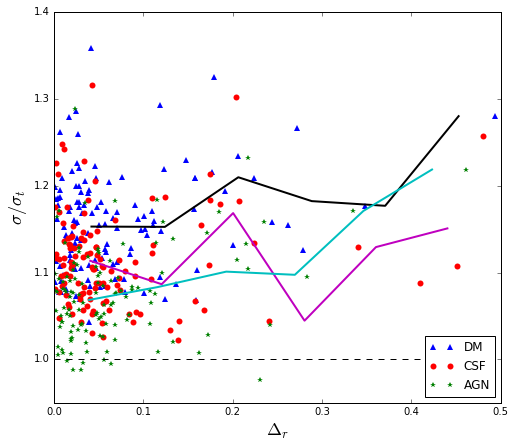

In [9]:
f1,(ax1)=subplots(1,sharex='all')
f1.set(figwidth=8,figheight=7)
ax1.plot(dr_dm, sg_dm,'b^',mec='none',label="DM")
ax1.plot(dr_cs, sg_cs,'ro',mec='none',label="CSF")
ax1.plot(dr_ag, sg_ag,'g*',mec='none',label="AGN")
b_md, b_ed, b_nb = binned_statistic(dr_dm,sg_dm, statistic='mean', bins=6)
ax1.plot(0.5*(b_ed[1:]+b_ed[:-1]),b_md,'k-',lw=2)
b_md, b_ed, b_nb = binned_statistic(dr_cs,sg_cs, statistic='mean', bins=6)
ax1.plot(0.5*(b_ed[1:]+b_ed[:-1]),b_md,'m-',lw=2)
b_md, b_ed, b_nb = binned_statistic(dr_ag,sg_ag, statistic='mean', bins=6)
ax1.plot(0.5*(b_ed[1:]+b_ed[:-1]),b_md,'c-',lw=2)

ax1.plot([0,0.49],[1,1],'k--')
ax1.set_ylabel(r"$\sigma/\sigma_t$",fontsize=18)
ax1.set_xlabel(r"$\Delta_r$",fontsize=18)
ax1.legend(loc=4,fontsize=12)

### T W E differences

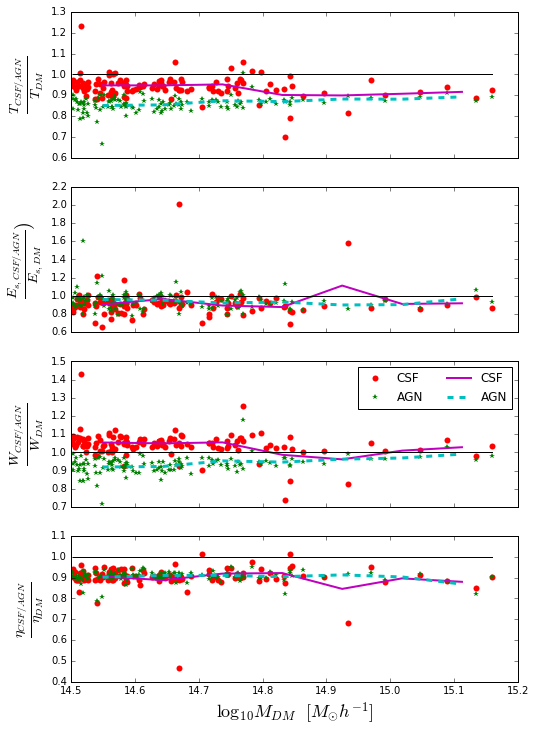

In [14]:
f2,(ax1, ax2, ax3, ax4)=subplots(4, 1,sharex='all')
f2.set(figwidth=8,figheight=12)

ax1.plot(MDM,T_cs/T_dm,"ro",mec='none',label="CSF")
ax1.plot(MDM,T_ag/T_dm,"g*",mec='none',label="AGN")

ax2.plot(MDM,E_cs/E_dm,"ro",mec='none',label="CSF")
ax2.plot(MDM,E_ag/E_dm,"g*",mec='none',label="AGN")

ax3.plot(MDM,W_cs/W_dm,"ro",mec='none',label="CSF")
ax3.plot(MDM,W_ag/W_dm,"g*",mec='none',label="AGN")

ax4.plot(MDM,et_cs/et_dm,"ro",mec='none',label="CSF")
ax4.plot(MDM,et_ag/et_dm,"g*",mec='none',label="AGN")

b_md, b_ed, b_nb = binned_statistic(MDM,T_cs/T_dm, statistic='mean', bins=7)
ax1.plot(0.5*(b_ed[1:]+b_ed[:-1]),b_md,'m-',lw=2, label="CSF")
b_md, b_ed, b_nb = binned_statistic(MDM,T_ag/T_dm, statistic='mean', bins=7)
ax1.plot(0.5*(b_ed[1:]+b_ed[:-1]),b_md,'c--',lw=3, label="AGN")

b_md, b_ed, b_nb = binned_statistic(MDM,E_cs/E_dm, statistic='mean', bins=7)
ax2.plot(0.5*(b_ed[1:]+b_ed[:-1]),b_md,'m-',lw=2)
b_md, b_ed, b_nb = binned_statistic(MDM,E_ag/E_dm, statistic='mean', bins=7)
ax2.plot(0.5*(b_ed[1:]+b_ed[:-1]),b_md,'c--',lw=3)

b_md, b_ed, b_nb = binned_statistic(MDM,W_cs/W_dm, statistic='mean', bins=7)
ax3.plot(0.5*(b_ed[1:]+b_ed[:-1]),b_md,'m-',lw=2, label="CSF")
b_md, b_ed, b_nb = binned_statistic(MDM,W_ag/W_dm, statistic='mean', bins=7)
ax3.plot(0.5*(b_ed[1:]+b_ed[:-1]),b_md,'c--',lw=3, label="AGN")

b_md, b_ed, b_nb = binned_statistic(MDM,et_cs/et_dm, statistic='mean', bins=7)
ax4.plot(0.5*(b_ed[1:]+b_ed[:-1]),b_md,'m-',lw=2)
b_md, b_ed, b_nb = binned_statistic(MDM,et_ag/et_dm, statistic='mean', bins=7)
ax4.plot(0.5*(b_ed[1:]+b_ed[:-1]),b_md,'c--',lw=3)

[ax.plot([MDM.min(),MDM.max()],[1,1],'k-') for ax in [ax1, ax2, ax3, ax4]]
#ax2.plot([MDM.min(),MDM.max()],[0,0],'k-')
#ax1.set_ylim(0.65,1.1)#; ax2.set_ylim(0,5.5)

ax3.legend(numpoints=1, ncol=2)
ax4.set_xlabel(r"$\log_{10} M_{DM} \ \ [M_{\odot} h^{-1}]$", fontsize=18)
ax1.set_ylabel(r"$\frac{T_{CSF/AGN}}{T_{DM}}$", fontsize=20)
ax2.set_ylabel(r"$\frac{E_{s, CSF/AGN}}{E_{s, DM}}$", fontsize=20)
ax3.set_ylabel(r"$\frac{W_{CSF/AGN}}{W_{DM}}$", fontsize=20)
ax4.set_ylabel(r"$\frac{\eta_{CSF/AGN}}{\eta_{DM}}$", fontsize=20)

###### Baryon effects

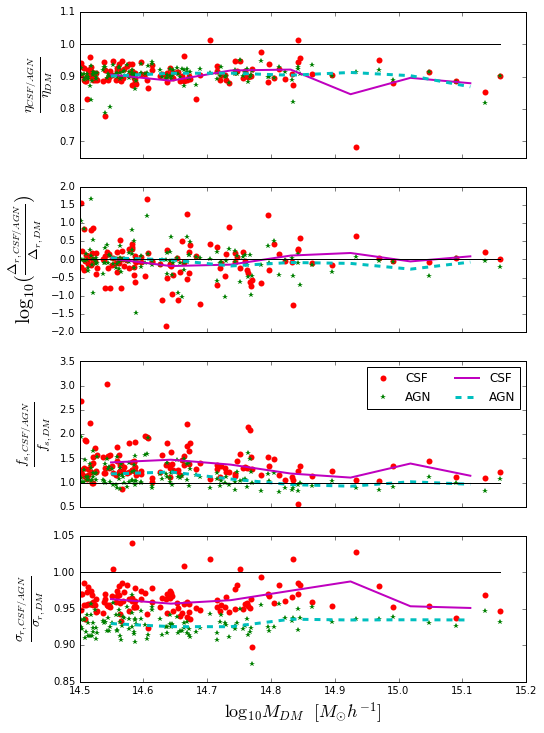

In [11]:
f3,(ax1, ax2, ax3, ax4)=subplots(4, 1,sharex='all')
f3.set(figwidth=8,figheight=12)

ax1.plot(MDM,et_cs/et_dm,"ro",mec='none',label="CSF")
ax1.plot(MDM,et_ag/et_dm,"g*",mec='none',label="AGN")

ax2.plot(MDM,np.log10(dr_cs/dr_dm),"ro",mec='none',label="CSF")
ax2.plot(MDM,np.log10(dr_ag/dr_dm),"g*",mec='none',label="AGN")

ax3.plot(MDM,fs_cs/fs_dm,"ro",mec='none',label="CSF")
ax3.plot(MDM,fs_ag/fs_dm,"g*",mec='none',label="AGN")

ax4.plot(MDM,sg_cs/sg_dm,"ro",mec='none',label="CSF")
ax4.plot(MDM,sg_ag/sg_dm,"g*",mec='none',label="AGN")

b_md, b_ed, b_nb = binned_statistic(MDM,et_cs/et_dm, statistic='mean', bins=7)
ax1.plot(0.5*(b_ed[1:]+b_ed[:-1]),b_md,'m-',lw=2, label="CSF")
b_md, b_ed, b_nb = binned_statistic(MDM,et_ag/et_dm, statistic='mean', bins=7)
ax1.plot(0.5*(b_ed[1:]+b_ed[:-1]),b_md,'c--',lw=3, label="AGN")

b_md, b_ed, b_nb = binned_statistic(MDM,np.log10(dr_cs/dr_dm), statistic='mean', bins=7)
ax2.plot(0.5*(b_ed[1:]+b_ed[:-1]),b_md,'m-',lw=2)
b_md, b_ed, b_nb = binned_statistic(MDM,np.log10(dr_ag/dr_dm), statistic='mean', bins=7)
ax2.plot(0.5*(b_ed[1:]+b_ed[:-1]),b_md,'c--',lw=3)

b_md, b_ed, b_nb = binned_statistic(MDM,fs_cs/fs_dm, statistic='mean', bins=7)
ax3.plot(0.5*(b_ed[1:]+b_ed[:-1]),b_md,'m-',lw=2, label="CSF")
b_md, b_ed, b_nb = binned_statistic(MDM,fs_ag/fs_dm, statistic='mean', bins=7)
ax3.plot(0.5*(b_ed[1:]+b_ed[:-1]),b_md,'c--',lw=3, label="AGN")

b_md, b_ed, b_nb = binned_statistic(MDM,sg_cs/sg_dm, statistic='mean', bins=7)
ax4.plot(0.5*(b_ed[1:]+b_ed[:-1]),b_md,'m-',lw=2)
b_md, b_ed, b_nb = binned_statistic(MDM,sg_ag/sg_dm, statistic='mean', bins=7)
ax4.plot(0.5*(b_ed[1:]+b_ed[:-1]),b_md,'c--',lw=3)

[ax.plot([MDM.min(),MDM.max()],[1,1],'k-') for ax in [ax1, ax3, ax4]]
ax2.plot([MDM.min(),MDM.max()],[0,0],'k-')
ax1.set_ylim(0.65,1.1)#; ax2.set_ylim(0,5.5)

ax3.legend(numpoints=1, ncol=2)
ax4.set_xlabel(r"$\log_{10} M_{DM} \ \ [M_{\odot} h^{-1}]$", fontsize=18)
ax1.set_ylabel(r"$\frac{\eta_{CSF/AGN}}{\eta_{DM}}$", fontsize=20)
ax2.set_ylabel(r"$\log_{10}(\frac{\Delta_{r, CSF/AGN}}{\Delta_{r, DM}})$", fontsize=20)
ax3.set_ylabel(r"$\frac{f_{s, CSF/AGN}}{f_{s, DM}}$", fontsize=20)
ax4.set_ylabel(r"$\frac{\sigma_{r, CSF/AGN}}{\sigma_{r, DM}}$", fontsize=20)


###### relaxed and un-relaxed cluster selection  

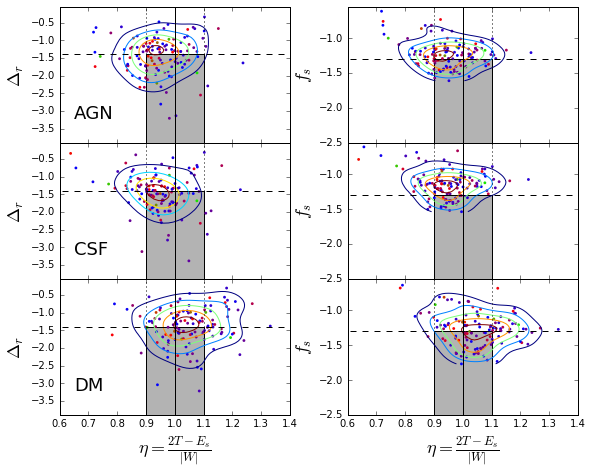

In [12]:
f4=figure(1,figsize=(8,7),dpi=250)
nbins = 50
gs  = gridspec.GridSpec(3, 2,width_ratios=[1,1])
ax1=subplot(gs[0]); ax2=subplot(gs[1],sharex=ax1)
ax3=subplot(gs[2],sharey=ax1,sharex=ax1); ax4=subplot(gs[3],sharey=ax2,sharex=ax1)
ax5=subplot(gs[4],sharey=ax1,sharex=ax1); ax6=subplot(gs[5],sharey=ax2,sharex=ax1)
ax1.set_position([0.08, 0.10,  0.4, 0.27], which=u'both')
ax2.set_position([0.58, 0.10,  0.4, 0.27], which=u'both')
ax3.set_position([0.08, 0.37,  0.4, 0.27], which=u'both')
ax4.set_position([0.58, 0.37,  0.4, 0.27], which=u'both')
ax5.set_position([0.08, 0.64,  0.4, 0.27], which=u'both')
ax6.set_position([0.58, 0.64,  0.4, 0.27], which=u'both')
setp([aa.get_xticklabels() for aa in [ax5,ax6,ax3,ax4]], visible=False)

for i in range(6):
    if i == 0:
        axx=ax1; x = et_dm; y = np.log10(dr_dm); m = MDM
    elif i == 1:
        axx=ax2; x = et_dm; y = np.log10(fs_dm); m = MDM
    elif i == 2:
        axx=ax3; x = et_cs; y = np.log10(dr_cs); m = MCS
    elif i == 3:
        axx=ax4; x = et_cs; y = np.log10(fs_cs); m = MCS
    elif i == 4:
        axx=ax5; x = et_ag; y = np.log10(dr_ag); m = MAG
    elif i == 5:
        axx=ax6; x = et_ag; y = np.log10(fs_ag); m = MAG
        
    k = kde.gaussian_kde(np.array([x,y]),bw_method=0.5)
    xi, yi = np.mgrid[x.min():x.max():nbins*1j, y.min():y.max():nbins*1j]
    zi = k(np.vstack([xi.flatten(), yi.flatten()]))

    p1=axx.scatter(x,y,s=8.,c=m,\
                marker="o",edgecolor='none',cmap='brg',vmin=14.5,vmax=15.2)
    CS = axx.contour(xi, yi, zi.reshape(xi.shape),5)
    
    if i%2 == 0:
        axx.fill_between([0.9,1.1],-4,np.log10(0.04),facecolor='0.7',zorder=-2)
    else:
        axx.fill_between([0.9,1.1],-4,np.log10(0.05),facecolor='0.7',zorder=-2)

ax1.set_ylim(-3.9,-0.05)
ax1.set_xlim(0.6,1.4)
ax1.set_xlabel(r"$\eta = \frac{2T - E_s}{|W|}$", fontsize=18)
ax1.set_ylabel(r"$\Delta_r$", fontsize=18); ax1.text(0.65, -3.2, 'DM', fontsize=18)
ax3.set_ylabel(r"$\Delta_r$", fontsize=18); ax3.text(0.65, -3.2, 'CSF', fontsize=18)
ax5.set_ylabel(r"$\Delta_r$", fontsize=18); ax5.text(0.65, -3.2, 'AGN', fontsize=18)

ax2.set_ylim(-2.5,-0.55)
ax2.set_xlabel(r"$\eta = \frac{2T - E_s}{|W|}$", fontsize=18)
ax2.set_ylabel(r"$f_s$", fontsize=18)
ax4.set_ylabel(r"$f_s$", fontsize=18)
ax6.set_ylabel(r"$f_s$", fontsize=18)

setp([aa.plot([1.,1],[-4,0],'k-') for aa in [ax5,ax6,ax3,ax4,ax1,ax2]])
setp([aa.plot([1.1,1.1],[-4,0],'k:') for aa in [ax5,ax6,ax3,ax4,ax1,ax2]])
setp([aa.plot([.9,.9],[-4,0],'k:') for aa in [ax5,ax6,ax3,ax4,ax1,ax2]])
setp([aa.plot([.4,1.4],[np.log10(0.04),np.log10(0.04)],'k--') for aa in [ax5,ax3,ax1]])
setp([aa.plot([.4,1.4],[np.log10(.05),np.log10(.05)],'k--') for aa in [ax6,ax4,ax2]])
cbar_ax = f1.add_axes([0.09, 0.96, 0.88, 0.03])
c1=f1.colorbar(p1,cax=cbar_ax, orientation='horizontal')
c1.set_label(r"$\log_{10} M$", fontsize=16)

In [13]:
iddm=np.where((et_dm<=1.1)&(et_dm>=0.9)&(dr_dm<0.04)&(fs_dm<8))[0]
idcs=np.where((et_cs<=1.1)&(et_cs>=0.9)&(dr_cs<0.04)&(fs_cs<8))[0]
idag=np.where((et_ag<=1.1)&(et_ag>=0.9)&(dr_ag<0.04)&(fs_ag<8))[0]
print(iddm.size,idcs.size,idag.size)

42 50 37


###### Baryon effects